# Lab 7
# BL.EN.U4AIE21071
# Lalith Abhiram Dasari


**Use HMM for classification of your speech signal using STFT features**

In [1]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

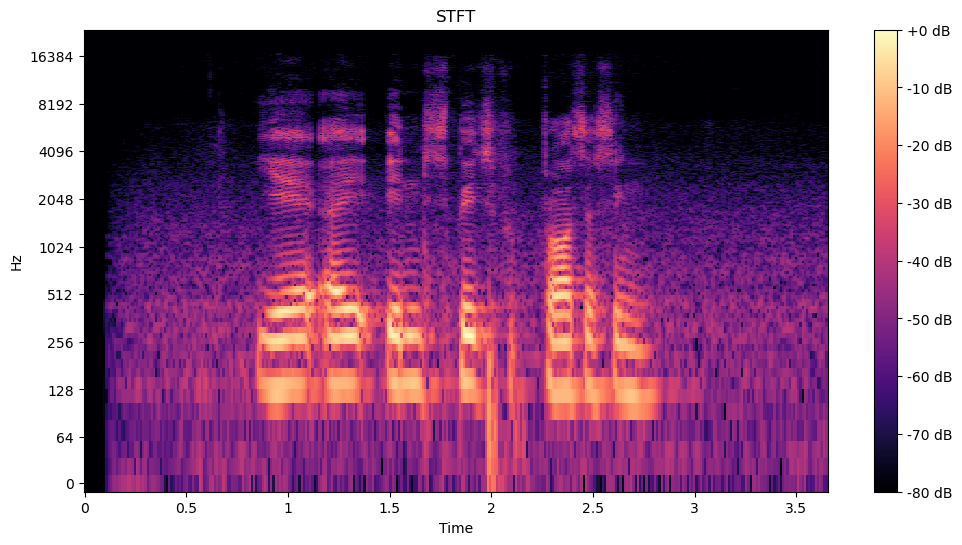

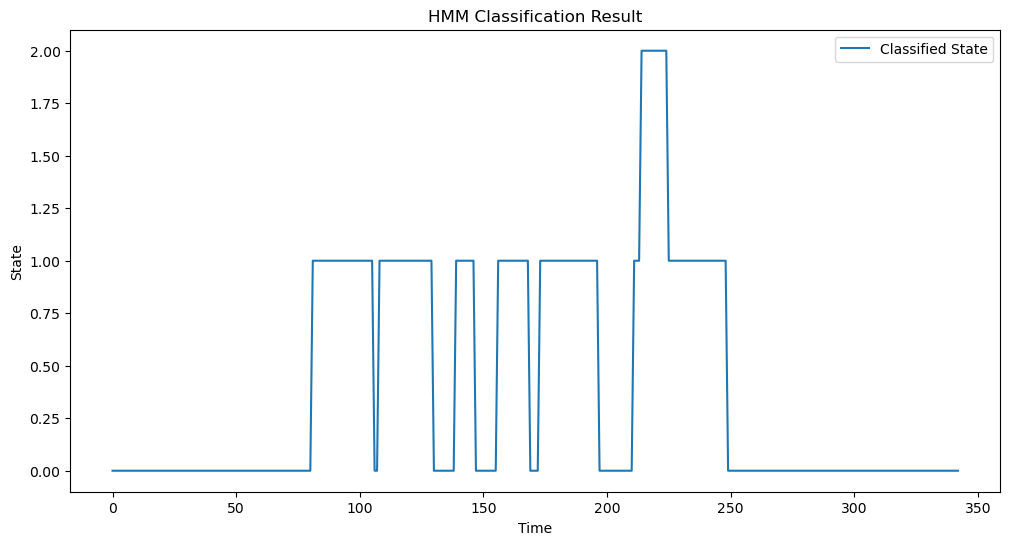

HMM Model Parameters:
Transition Matrix:
[[0.97169811 0.02830189 0.        ]
 [0.05042017 0.94117647 0.00840336]
 [0.         0.09090909 0.90909091]]
Means:
[[4.43664950e-01 6.42093798e-01 6.47022282e-01 ... 1.57787258e-04
  1.55141892e-04 1.54924215e-04]
 [8.59699627e-01 1.11353189e+00 1.18988214e+00 ... 1.54480699e-04
  1.47750120e-04 1.42917627e-04]
 [6.28935426e-01 4.74812447e-01 5.97738288e-01 ... 1.70406342e-04
  1.75343946e-04 1.38447690e-04]]
Covariances:
[[[1.52340435e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.90773698e-01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.39482970e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.69948735e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   4.69930355e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = "s1.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
